In [1]:
import numpy as np

In [2]:
points = np.loadtxt('points.txt')

In [3]:
# import os
# np.savetxt('points.txt', array name)

In [4]:
points

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431],
       [ 1.35999602,  0.94995827],
       [ 0.42291856, -0.7349534 ],
       [-1.68576139,  0.10686728],
       [ 0.90629995,  1.09105162],
       [-1.56478322, -0.84675394],
       [-0.0257849 , -1.18672539],
       [ 0.83027324,  1.14504612],
       [ 1.22450432,  1.35066759],
       [-0.15394596, -0.71704301],
       [ 0.86358809,  1.06824613],
       [-1.43386366, -0.2381297 ],
       [ 0.03844769, -0.74635022],
       [-1.58567922,  0.08499354],
       [ 0.6359888 , -0.58477698],
       [ 0.24417242, -0.53172465],
       [-2.19680359,  0.49473677],
       [ 1.0323503 , -0.55688   ],
       [-0.28858067, -0.39972528],
       [ 0.20597008,

### Clustering 2D points

In [5]:
new_points= np.loadtxt('new_points.txt')

In [6]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


[2 0 1 2 0 2 0 0 0 1 2 0 0 1 1 0 1 1 0 0 1 0 2 0 2 1 0 1 1 2 2 0 0 0 1 2 0
 0 2 0 1 2 2 1 2 0 1 1 0 0 0 0 1 1 2 2 1 1 1 2 2 0 0 0 2 0 1 0 2 1 2 2 2 0
 2 1 1 2 0 1 2 1 2 0 1 0 1 2 0 0 0 2 0 0 2 1 1 1 1 2 0 2 1 1 2 2 0 2 1 1 2
 1 1 1 0 0 0 0 1 1 0 2 0 1 0 2 1 0 1 1 0 1 0 1 2 0 2 2 0 1 2 0 2 2 1 0 0 2
 1 2 1 0 2 1 1 2 1 0 0 1 0 1 1 0 0 2 0 0 1 2 1 2 2 0 2 0 0 2 2 1 2 2 2 1 0
 0 2 1 2 1 1 0 0 0 2 0 0 0 1 1 2 0 2 2 2 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 2 1 2 2 1 2 1 2 1 0 0 1 0 0 0 1 2 2 1 0 0 1 0 1 1 0 1 1 2 1 2 2 2 0 1
 1 1 2 0 2 1 2 1 1 0 2 2 2 1 0 0 0 2 0 1 1 0 2 2 1 2 2 1 2 0 2 1 1 1 1 0 1
 1 0 0 2]


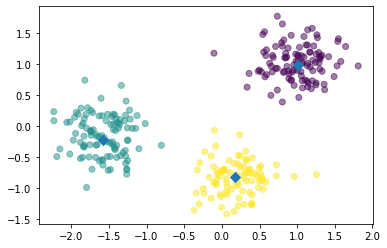

In [7]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels, alpha=.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y, marker='D',s=50)
plt.show()


### How many clusters of grain?

In [8]:
samples = np.loadtxt('seeds_dataset.txt')
# samples.shape

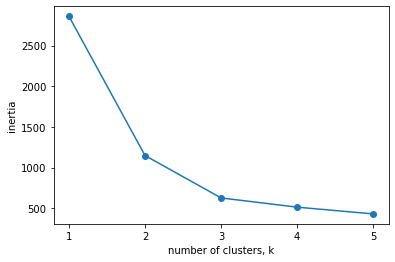

In [9]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model= KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


### Evaluating the grain clustering

In [10]:
lineList = [line.strip('\n') for line in open('varieties.txt')]
varieties = [x.strip() for x in lineList]

In [11]:
import pandas as pd

In [12]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0           1          60
1                       0          64          10
2                      70           5           0


In [13]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)


### Clustering the fish data

In [14]:
samples=np.array([[ 242. ,   23.2,   25.4,   30. ,   38.4,   13.4],
       [ 290. ,   24. ,   26.3,   31.2,   40. ,   13.8],
       [ 340. ,   23.9,   26.5,   31.1,   39.8,   15.1],
       [ 363. ,   26.3,   29. ,   33.5,   38. ,   13.3],
       [ 430. ,   26.5,   29. ,   34. ,   36.6,   15.1],
       [ 450. ,   26.8,   29.7,   34.7,   39.2,   14.2],
       [ 500. ,   26.8,   29.7,   34.5,   41.1,   15.3],
       [ 390. ,   27.6,   30. ,   35. ,   36.2,   13.4],
       [ 450. ,   27.6,   30. ,   35.1,   39.9,   13.8],
       [ 500. ,   28.5,   30.7,   36.2,   39.3,   13.7],
       [ 475. ,   28.4,   31. ,   36.2,   39.4,   14.1],
       [ 500. ,   28.7,   31. ,   36.2,   39.7,   13.3],
       [ 500. ,   29.1,   31.5,   36.4,   37.8,   12. ],
       [ 600. ,   29.4,   32. ,   37.2,   40.2,   13.9],
       [ 600. ,   29.4,   32. ,   37.2,   41.5,   15. ],
       [ 700. ,   30.4,   33. ,   38.3,   38.8,   13.8],
       [ 700. ,   30.4,   33. ,   38.5,   38.8,   13.5],
       [ 610. ,   30.9,   33.5,   38.6,   40.5,   13.3],
       [ 650. ,   31. ,   33.5,   38.7,   37.4,   14.8],
       [ 575. ,   31.3,   34. ,   39.5,   38.3,   14.1],
       [ 685. ,   31.4,   34. ,   39.2,   40.8,   13.7],
       [ 620. ,   31.5,   34.5,   39.7,   39.1,   13.3],
       [ 680. ,   31.8,   35. ,   40.6,   38.1,   15.1],
       [ 700. ,   31.9,   35. ,   40.5,   40.1,   13.8],
       [ 725. ,   31.8,   35. ,   40.9,   40. ,   14.8],
       [ 720. ,   32. ,   35. ,   40.6,   40.3,   15. ],
       [ 714. ,   32.7,   36. ,   41.5,   39.8,   14.1],
       [ 850. ,   32.8,   36. ,   41.6,   40.6,   14.9],
       [1000. ,   33.5,   37. ,   42.6,   44.5,   15.5],
       [ 920. ,   35. ,   38.5,   44.1,   40.9,   14.3],
       [ 955. ,   35. ,   38.5,   44. ,   41.1,   14.3],
       [ 925. ,   36.2,   39.5,   45.3,   41.4,   14.9],
       [ 975. ,   37.4,   41. ,   45.9,   40.6,   14.7],
       [ 950. ,   38. ,   41. ,   46.5,   37.9,   13.7],
       [  40. ,   12.9,   14.1,   16.2,   25.6,   14. ],
       [  69. ,   16.5,   18.2,   20.3,   26.1,   13.9],
       [  78. ,   17.5,   18.8,   21.2,   26.3,   13.7],
       [  87. ,   18.2,   19.8,   22.2,   25.3,   14.3],
       [ 120. ,   18.6,   20. ,   22.2,   28. ,   16.1],
       [   0. ,   19. ,   20.5,   22.8,   28.4,   14.7],
       [ 110. ,   19.1,   20.8,   23.1,   26.7,   14.7],
       [ 120. ,   19.4,   21. ,   23.7,   25.8,   13.9],
       [ 150. ,   20.4,   22. ,   24.7,   23.5,   15.2],
       [ 145. ,   20.5,   22. ,   24.3,   27.3,   14.6],
       [ 160. ,   20.5,   22.5,   25.3,   27.8,   15.1],
       [ 140. ,   21. ,   22.5,   25. ,   26.2,   13.3],
       [ 160. ,   21.1,   22.5,   25. ,   25.6,   15.2],
       [ 169. ,   22. ,   24. ,   27.2,   27.7,   14.1],
       [ 161. ,   22. ,   23.4,   26.7,   25.9,   13.6],
       [ 200. ,   22.1,   23.5,   26.8,   27.6,   15.4],
       [ 180. ,   23.6,   25.2,   27.9,   25.4,   14. ],
       [ 290. ,   24. ,   26. ,   29.2,   30.4,   15.4],
       [ 272. ,   25. ,   27. ,   30.6,   28. ,   15.6],
       [ 390. ,   29.5,   31.7,   35. ,   27.1,   15.3],
       [   6.7,    9.3,    9.8,   10.8,   16.1,    9.7],
       [   7.5,   10. ,   10.5,   11.6,   17. ,   10. ],
       [   7. ,   10.1,   10.6,   11.6,   14.9,    9.9],
       [   9.7,   10.4,   11. ,   12. ,   18.3,   11.5],
       [   9.8,   10.7,   11.2,   12.4,   16.8,   10.3],
       [   8.7,   10.8,   11.3,   12.6,   15.7,   10.2],
       [  10. ,   11.3,   11.8,   13.1,   16.9,    9.8],
       [   9.9,   11.3,   11.8,   13.1,   16.9,    8.9],
       [   9.8,   11.4,   12. ,   13.2,   16.7,    8.7],
       [  12.2,   11.5,   12.2,   13.4,   15.6,   10.4],
       [  13.4,   11.7,   12.4,   13.5,   18. ,    9.4],
       [  12.2,   12.1,   13. ,   13.8,   16.5,    9.1],
       [  19.7,   13.2,   14.3,   15.2,   18.9,   13.6],
       [  19.9,   13.8,   15. ,   16.2,   18.1,   11.6],
       [ 200. ,   30. ,   32.3,   34.8,   16. ,    9.7],
       [ 300. ,   31.7,   34. ,   37.8,   15.1,   11. ],
       [ 300. ,   32.7,   35. ,   38.8,   15.3,   11.3],
       [ 300. ,   34.8,   37.3,   39.8,   15.8,   10.1],
       [ 430. ,   35.5,   38. ,   40.5,   18. ,   11.3],
       [ 345. ,   36. ,   38.5,   41. ,   15.6,    9.7],
       [ 456. ,   40. ,   42.5,   45.5,   16. ,    9.5],
       [ 510. ,   40. ,   42.5,   45.5,   15. ,    9.8],
       [ 540. ,   40.1,   43. ,   45.8,   17. ,   11.2],
       [ 500. ,   42. ,   45. ,   48. ,   14.5,   10.2],
       [ 567. ,   43.2,   46. ,   48.7,   16. ,   10. ],
       [ 770. ,   44.8,   48. ,   51.2,   15. ,   10.5],
       [ 950. ,   48.3,   51.7,   55.1,   16.2,   11.2],
       [1250. ,   52. ,   56. ,   59.7,   17.9,   11.7],
       [1600. ,   56. ,   60. ,   64. ,   15. ,    9.6],
       [1550. ,   56. ,   60. ,   64. ,   15. ,    9.6],
       [1650. ,   59. ,   63.4,   68. ,   15.9,   11. ]])

In [15]:
species=['Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Bream',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Roach',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Smelt',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike',
 'Pike']

In [16]:
# Import pandas
import pandas as pd

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels,'species':species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            0     0      0     13
1           33     0      1      0
2            1     0     19      1
3            0    17      0      0


### Clustering stocks using KMeans

In [17]:
movements = pd.read_csv('movements.csv').iloc[:, 1:]

In [18]:
movements.reset_index(drop=True, inplace=True)
movements.to_numpy

<bound method DataFrame.to_numpy of     2010-01-04  2010-01-05  2010-01-06  2010-01-07  2010-01-08  2010-01-11  \
0     0.580000   -0.220005   -3.409998   -1.170000    1.680011   -2.689994   
1    -0.640002   -0.650000   -0.210001   -0.420000    0.710001   -0.200001   
2    -2.350006    1.260009   -2.350006   -2.009995    2.960006   -2.309997   
3     0.109997    0.000000    0.260002    0.720002    0.190003   -0.270001   
4     0.459999    1.770000    1.549999    2.690003    0.059997   -1.080002   
5     0.450000    0.460001    0.180000    0.250000   -0.199999   -0.060000   
6     0.180000    0.220001    0.040001    0.250000   -0.360001   -0.099999   
7     0.730000    0.369999   -0.099999   -0.169999    0.030003    0.110001   
8     0.899997    0.700001    0.250000    0.369999    1.090000    3.179996   
9     0.360000    0.909996   -0.290001   -0.059998    1.300003    0.510003   
10    0.809991   -0.020006    0.340003    0.089988    0.650006    0.029999   
11    0.580000   -0.020000  

In [19]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [20]:
companies=['Apple','AIG','Amazon','American express','Boeing','Bank of America','British American Tobacco','Canon','Caterpillar','Colgate-Palmolive','ConocoPhillips','Cisco','Chevron','DuPont de Nemours','Dell','Ford','General Electrics','Google/Alphabet','Goldman Sachs','GlaxoSmithKline','Home Depot','Honda','HP','IBM','Intel','Johnson & Johnson','JPMorgan Chase','Kimberly-Clark','Coca Cola','Lookheed Martin','MasterCard','McDonalds','3M','Microsoft','Mitsubishi','Navistar','Northrop Grumman','Novartis','Pepsi','Pfizer','Procter Gamble','Philip Morris','Royal Dutch Shell','SAP','Schlumberger','Sony','Sanofi-Aventis','Symantec','Toyota','Total','Taiwan Semiconductor Manufacturing','Texas instruments','Unilever','Valero Energy','Walgreen','Wells Fargo','Wal-Mart','Exxon','Xerox','Yahoo']

### Which stocks move together?

In [21]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                           companies
23       0                                 IBM
57       0                               Exxon
53       0                       Valero Energy
31       0                           McDonalds
49       0                               Total
39       0                              Pfizer
42       0                   Royal Dutch Shell
44       0                        Schlumberger
43       0                                 SAP
10       0                      ConocoPhillips
12       0                             Chevron
33       1                           Microsoft
11       1                               Cisco
24       1                               Intel
36       2                    Northrop Grumman
4        2                              Boeing
29       2                     Lookheed Martin
46       3                      Sanofi-Aventis
6        3            British American Tobacco
37       3                            Novartis
52       3   

### Hierarchical clustering of the grain data

In [ ]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


### Hierarchies of stocks

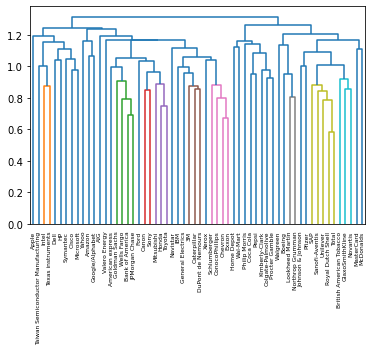

In [23]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=companies,
    leaf_rotation=90,
    leaf_font_size=6
    )
plt.show()

### **Different linkage, different hierarchical clustering!**

In [ ]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(
    mergings,
    labels=country_names,
    leaf_rotation=90,
    leaf_font_size=6
    )
plt.show()


### **Extracting the cluster labels**

In [ ]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


### **t-SNE visualization of grain dataset**

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()

### **A t-SNE map of the stock market**

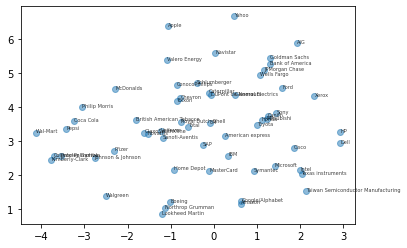

In [26]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


## **Correlated data in nature**

In [27]:
#an array grains giving the width and length of samples of grain.
grains=np.array([[3.312, 5.763],
       [3.333, 5.554],
       [3.337, 5.291],
       [3.379, 5.324],
       [3.562, 5.658],
       [3.312, 5.386],
       [3.259, 5.563],
       [3.302, 5.42 ],
       [3.465, 6.053],
       [3.505, 5.884],
       [3.242, 5.714],
       [3.201, 5.438],
       [3.199, 5.439],
       [3.156, 5.479],
       [3.114, 5.482],
       [3.333, 5.351],
       [3.383, 5.119],
       [3.514, 5.527],
       [3.466, 5.205],
       [3.049, 5.226],
       [3.129, 5.658],
       [3.168, 5.52 ],
       [3.507, 5.618],
       [2.936, 5.099],
       [3.245, 5.789],
       [3.421, 5.833],
       [3.026, 5.395],
       [2.956, 5.395],
       [3.221, 5.541],
       [3.065, 5.516],
       [2.975, 5.454],
       [3.371, 5.757],
       [3.186, 5.717],
       [3.15 , 5.585],
       [3.328, 5.712],
       [3.485, 5.709],
       [3.464, 5.826],
       [3.683, 5.832],
       [3.288, 5.656],
       [3.298, 5.397],
       [3.156, 5.348],
       [3.158, 5.351],
       [3.201, 5.138],
       [3.396, 5.877],
       [3.462, 5.579],
       [3.155, 5.376],
       [3.393, 5.701],
       [3.377, 5.57 ],
       [3.291, 5.545],
       [3.258, 5.678],
       [3.272, 5.585],
       [3.434, 5.674],
       [3.113, 5.715],
       [3.199, 5.504],
       [3.113, 5.741],
       [3.212, 5.702],
       [3.377, 5.388],
       [3.412, 5.384],
       [3.419, 5.662],
       [3.032, 5.159],
       [2.85 , 5.008],
       [2.879, 4.902],
       [3.042, 5.076],
       [3.07 , 5.395],
       [3.026, 5.262],
       [3.119, 5.139],
       [3.19 , 5.63 ],
       [3.158, 5.609],
       [3.153, 5.569],
       [2.882, 5.412],
       [3.561, 6.191],
       [3.484, 5.998],
       [3.594, 5.978],
       [3.93 , 6.154],
       [3.486, 6.017],
       [3.438, 5.927],
       [3.403, 6.064],
       [3.814, 6.579],
       [3.639, 6.445],
       [3.566, 5.85 ],
       [3.467, 5.875],
       [3.857, 6.006],
       [3.864, 6.285],
       [3.772, 6.384],
       [3.801, 6.366],
       [3.651, 6.173],
       [3.764, 6.084],
       [3.67 , 6.549],
       [4.033, 6.573],
       [4.032, 6.45 ],
       [3.785, 6.581],
       [3.796, 6.172],
       [3.693, 6.272],
       [3.86 , 6.037],
       [3.485, 6.666],
       [3.463, 6.139],
       [3.81 , 6.341],
       [3.552, 6.449],
       [3.512, 6.271],
       [3.684, 6.219],
       [3.525, 5.718],
       [3.694, 5.89 ],
       [3.892, 6.113],
       [3.681, 6.369],
       [3.755, 6.248],
       [3.786, 6.037],
       [3.806, 6.152],
       [3.573, 6.033],
       [3.763, 6.675],
       [3.674, 6.153],
       [3.769, 6.107],
       [3.791, 6.303],
       [3.902, 6.183],
       [3.737, 6.259],
       [3.991, 6.563],
       [3.719, 6.416],
       [3.897, 6.051],
       [3.815, 6.245],
       [3.769, 6.227],
       [3.857, 6.493],
       [3.962, 6.315],
       [3.563, 6.059],
       [3.387, 5.762],
       [3.771, 5.98 ],
       [3.582, 5.363],
       [3.869, 6.111],
       [3.594, 6.285],
       [3.687, 5.979],
       [3.773, 6.513],
       [3.69 , 5.791],
       [3.755, 5.979],
       [3.825, 6.144],
       [3.268, 5.884],
       [3.395, 5.845],
       [3.408, 5.776],
       [3.465, 5.477],
       [3.574, 6.145],
       [3.231, 5.92 ],
       [3.286, 5.832],
       [3.472, 5.872],
       [2.994, 5.472],
       [3.073, 5.541],
       [3.074, 5.389],
       [2.967, 5.224],
       [2.777, 5.314],
       [2.687, 5.279],
       [2.719, 5.176],
       [2.967, 5.267],
       [2.911, 5.386],
       [2.648, 5.317],
       [2.84 , 5.263],
       [2.776, 5.405],
       [2.833, 5.408],
       [2.693, 5.22 ],
       [2.755, 5.175],
       [2.675, 5.25 ],
       [2.849, 5.053],
       [2.745, 5.394],
       [2.678, 5.444],
       [2.695, 5.304],
       [2.879, 5.451],
       [2.81 , 5.35 ],
       [2.847, 5.267],
       [2.968, 5.333],
       [2.794, 5.011],
       [2.941, 5.105],
       [2.897, 5.319],
       [2.837, 5.417],
       [2.668, 5.176],
       [2.715, 5.09 ],
       [2.701, 5.325],
       [2.845, 5.167],
       [2.763, 5.088],
       [2.763, 5.136],
       [2.641, 5.278],
       [2.821, 4.981],
       [2.71 , 5.186],
       [2.642, 5.145],
       [2.758, 5.18 ],
       [2.893, 5.357],
       [2.775, 5.09 ],
       [3.017, 5.236],
       [2.909, 5.24 ],
       [2.85 , 5.108],
       [3.026, 5.495],
       [2.683, 5.363],
       [2.716, 5.413],
       [2.675, 5.088],
       [2.821, 5.089],
       [2.787, 4.899],
       [2.717, 5.046],
       [2.804, 5.091],
       [2.953, 5.132],
       [2.63 , 5.18 ],
       [2.975, 5.236],
       [3.126, 5.16 ],
       [3.054, 5.224],
       [3.128, 5.32 ],
       [2.911, 5.41 ],
       [3.155, 5.073],
       [2.989, 5.219],
       [3.135, 4.984],
       [2.81 , 5.009],
       [3.091, 5.183],
       [2.96 , 5.204],
       [2.981, 5.137],
       [2.795, 5.14 ],
       [3.232, 5.236],
       [2.836, 5.175],
       [2.974, 5.243]])

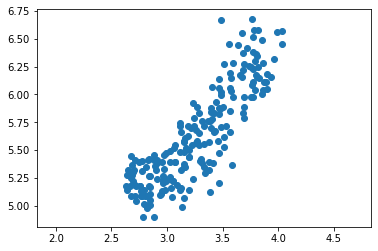

0.8604149377143469


In [28]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)


### **Decorrelating the grain measurements with PCA**
- use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation

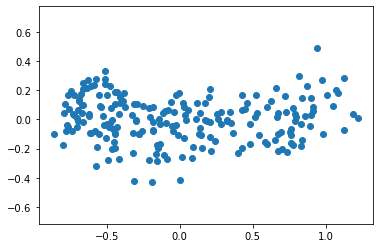

4.85722573273506e-17


In [29]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

### **The first principal component**

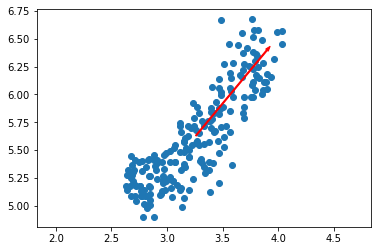

In [30]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

### **Variance of the PCA features**

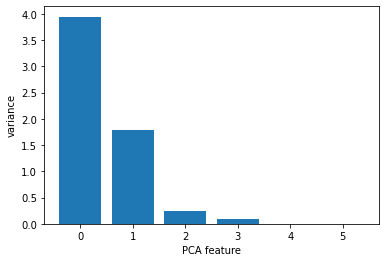

In [31]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


In [32]:
##scaled fish measurements 
scaled_samples=np.array([[-0.50109735, -0.36878558, -0.34323399, -0.23781518,  1.0032125 ,
         0.25373964],
       [-0.37434344, -0.29750241, -0.26893461, -0.14634781,  1.15869615,
         0.44376493],
       [-0.24230812, -0.30641281, -0.25242364, -0.15397009,  1.13926069,
         1.0613471 ],
       [-0.18157187, -0.09256329, -0.04603648,  0.02896467,  0.96434159,
         0.20623332],
       [-0.00464454, -0.0747425 , -0.04603648,  0.06707608,  0.8282934 ,
         1.0613471 ],
       [ 0.04816959, -0.04801131,  0.01175193,  0.12043205,  1.08095432,
         0.63379021],
       [ 0.18020491, -0.04801131,  0.01175193,  0.10518748,  1.26559115,
         1.15635974],
       [-0.11027279,  0.02327186,  0.03651839,  0.14329889,  0.78942248,
         0.25373964],
       [ 0.04816959,  0.02327186,  0.03651839,  0.15092117,  1.14897842,
         0.44376493],
       [ 0.18020491,  0.10346543,  0.09430679,  0.23476627,  1.09067205,
         0.39625861],
       [ 0.11418725,  0.09455503,  0.11907325,  0.23476627,  1.10038978,
         0.58628389],
       [ 0.18020491,  0.12128622,  0.11907325,  0.23476627,  1.12954296,
         0.20623332],
       [ 0.18020491,  0.1569278 ,  0.16035069,  0.25001083,  0.94490613,
        -0.41134885],
       [ 0.44427556,  0.18365899,  0.20162812,  0.31098909,  1.1781316 ,
         0.49127125],
       [ 0.44427556,  0.18365899,  0.20162812,  0.31098909,  1.30446206,
         1.01384078],
       [ 0.7083462 ,  0.27276296,  0.28418298,  0.39483418,  1.04208341,
         0.44376493],
       [ 0.7083462 ,  0.27276296,  0.28418298,  0.41007875,  1.04208341,
         0.30124596],
       [ 0.47068262,  0.31731494,  0.32546042,  0.41770103,  1.20728478,
         0.20623332],
       [ 0.57631088,  0.32622533,  0.32546042,  0.42532331,  0.90603522,
         0.91882813],
       [ 0.3782579 ,  0.35295652,  0.36673785,  0.48630156,  0.99349477,
         0.58628389],
       [ 0.66873561,  0.36186692,  0.36673785,  0.46343472,  1.23643797,
         0.39625861],
       [ 0.49708969,  0.37077732,  0.40801528,  0.50154612,  1.07123659,
         0.20623332],
       [ 0.65553208,  0.3975085 ,  0.44929271,  0.57014666,  0.97405931,
         1.0613471 ],
       [ 0.7083462 ,  0.4064189 ,  0.44929271,  0.56252438,  1.16841387,
         0.44376493],
       [ 0.77436387,  0.3975085 ,  0.44929271,  0.5930135 ,  1.15869615,
         0.91882813],
       [ 0.76116033,  0.4153293 ,  0.44929271,  0.57014666,  1.18784933,
         1.01384078],
       [ 0.74531609,  0.47770207,  0.53184758,  0.63874719,  1.13926069,
         0.58628389],
       [ 1.10445217,  0.48661247,  0.53184758,  0.64636947,  1.21700251,
         0.96633446],
       [ 1.50055814,  0.54898524,  0.61440245,  0.72259229,  1.5959939 ,
         1.25137238],
       [ 1.28930162,  0.68264119,  0.73823474,  0.83692651,  1.2461557 ,
         0.68129653],
       [ 1.38172635,  0.68264119,  0.73823474,  0.82930423,  1.26559115,
         0.68129653],
       [ 1.30250516,  0.78956594,  0.82078961,  0.92839389,  1.29474434,
         0.96633446],
       [ 1.43454048,  0.8964907 ,  0.94462191,  0.97412758,  1.21700251,
         0.87132181],
       [ 1.36852282,  0.94995308,  0.94462191,  1.01986127,  0.95462386,
         0.39625861],
       [-1.03452005, -1.2865564 , -1.27610397, -1.28969003, -0.24065667,
         0.53877757],
       [-0.95793956, -0.96578213, -0.93762902, -0.97717649, -0.19206803,
         0.49127125],
       [-0.93417321, -0.87667817, -0.8880961 , -0.90857596, -0.17263258,
         0.39625861],
       [-0.91040685, -0.8143054 , -0.80554124, -0.83235314, -0.26980986,
         0.68129653],
       [-0.82326354, -0.77866381, -0.78903027, -0.83235314, -0.0074312 ,
         1.5364103 ],
       [-1.14014831, -0.74302223, -0.74775283, -0.78661945,  0.03143971,
         0.87132181],
       [-0.8496706 , -0.73411183, -0.72298637, -0.76375261, -0.13376167,
         0.87132181],
       [-0.82326354, -0.70738064, -0.7064754 , -0.71801892, -0.22122122,
         0.49127125],
       [-0.74404234, -0.61827668, -0.62392054, -0.6417961 , -0.44472896,
         1.10885342],
       [-0.75724587, -0.60936628, -0.62392054, -0.67228523, -0.0754553 ,
         0.82381549],
       [-0.71763528, -0.60936628, -0.5826431 , -0.59606241, -0.02686666,
         1.0613471 ],
       [-0.77044941, -0.5648143 , -0.5826431 , -0.61892926, -0.18235031,
         0.20623332],
       [-0.71763528, -0.5559039 , -0.5826431 , -0.61892926, -0.24065667,
         1.10885342],
       [-0.69386892, -0.47571034, -0.4588108 , -0.45123907, -0.03658439,
         0.58628389],
       [-0.71499457, -0.47571034, -0.50834372, -0.48935047, -0.21150349,
         0.34875228],
       [-0.61200702, -0.46679994, -0.50008824, -0.48172819, -0.04630212,
         1.20386606],
       [-0.66482115, -0.33314399, -0.35974497, -0.39788309, -0.26009213,
         0.53877757],
       [-0.37434344, -0.29750241, -0.29370107, -0.29879344,  0.22579427,
         1.20386606],
       [-0.42187616, -0.20839845, -0.21114621, -0.19208149, -0.0074312 ,
         1.2988787 ],
       [-0.11027279,  0.19256939,  0.17686166,  0.14329889, -0.09489075,
         1.15635974],
       [-1.12245558, -1.60733067, -1.63108989, -1.70129323, -1.16384082,
        -1.50399423],
       [-1.12034301, -1.5449579 , -1.57330149, -1.64031498, -1.07638127,
        -1.36147526],
       [-1.12166336, -1.5360475 , -1.565046  , -1.64031498, -1.28045356,
        -1.40898159],
       [-1.11453346, -1.50931631, -1.53202405, -1.60982586, -0.95005081,
        -0.64888045],
       [-1.11426939, -1.48258512, -1.51551308, -1.57933673, -1.09581673,
        -1.2189563 ],
       [-1.11717416, -1.47367473, -1.5072576 , -1.56409217, -1.20271174,
        -1.26646262],
       [-1.11374125, -1.42912274, -1.46598016, -1.52598076, -1.086099  ,
        -1.45648791],
       [-1.11400532, -1.42912274, -1.46598016, -1.52598076, -1.086099  ,
        -1.88404479],
       [-1.11426939, -1.42021235, -1.44946919, -1.51835848, -1.10553446,
        -1.97905744],
       [-1.10793169, -1.41130195, -1.43295822, -1.50311391, -1.21242946,
        -1.17144998],
       [-1.10476284, -1.39348116, -1.41644724, -1.49549163, -0.97920399,
        -1.64651319],
       [-1.10793169, -1.35783957, -1.36691432, -1.47262479, -1.12496991,
        -1.78903215],
       [-1.08812639, -1.25982521, -1.259593  , -1.36591285, -0.89174444,
         0.34875228],
       [-1.08759825, -1.20636284, -1.20180459, -1.28969003, -0.96948627,
        -0.60137413],
       [-0.61200702,  0.23712137,  0.22639458,  0.12805433, -1.17355855,
        -1.50399423],
       [-0.34793638,  0.38859811,  0.36673785,  0.35672277, -1.2610181 ,
        -0.88641206],
       [-0.34793638,  0.47770207,  0.44929271,  0.43294559, -1.24158265,
        -0.74389309],
       [-0.34793638,  0.6648204 ,  0.6391689 ,  0.5091684 , -1.19299401,
        -1.31396894],
       [-0.00464454,  0.72719317,  0.69695731,  0.56252438, -0.97920399,
        -0.74389309],
       [-0.22910458,  0.77174515,  0.73823474,  0.60063578, -1.21242946,
        -1.50399423],
       [ 0.06401383,  1.128161  ,  1.0684542 ,  0.94363845, -1.17355855,
        -1.59900687],
       [ 0.20661198,  1.128161  ,  1.0684542 ,  0.94363845, -1.27073583,
        -1.45648791],
       [ 0.28583317,  1.1370714 ,  1.10973164,  0.9665053 , -1.07638127,
        -0.79139942],
       [ 0.18020491,  1.30636893,  1.27484137,  1.13419549, -1.31932447,
        -1.26646262],
       [ 0.35713225,  1.41329369,  1.35739623,  1.18755146, -1.17355855,
        -1.36147526],
       [ 0.89319566,  1.55586003,  1.52250596,  1.3781085 , -1.27073583,
        -1.12394366],
       [ 1.36852282,  1.8677239 ,  1.82795897,  1.67537748, -1.1541231 ,
        -0.79139942],
       [ 2.16073475,  2.19740857,  2.18294489,  2.02600243, -0.98892172,
        -0.55386781],
       [ 3.08498201,  2.55382442,  2.51316435,  2.35376053, -1.27073583,
        -1.55150055],
       [ 2.95294669,  2.55382442,  2.51316435,  2.35376053, -1.27073583,
        -1.55150055],
       [ 3.21701733,  2.82113631,  2.79385089,  2.65865179, -1.18327628,
        -0.88641206]])

In [33]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)


(85, 2)


### **A tf-idf word-frequency array**

In [34]:
documents=['cats say meow', 'dogs say woof', 'dogs chase cats']

In [35]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


### **Clustering Wikipedia part I**

In [36]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)


### **Clustering Wikipedia part II**

In [37]:
import pandas as pd
from scipy.sparse import csr_matrix

df = pd.read_csv('wikipedia-vectors.csv', index_col=0)
articles = csr_matrix(df.transpose())
titles = list(df.columns)

In [38]:
articles

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

In [39]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


    label                                        article
29      0                               Jennifer Aniston
28      0                                  Anne Hathaway
27      0                                 Dakota Fanning
26      0                                     Mila Kunis
25      0                                  Russell Crowe
24      0                                   Jessica Biel
23      0                           Catherine Zeta-Jones
22      0                              Denzel Washington
21      0                             Michael Fassbender
20      0                                 Angelina Jolie
40      1                                    Tonsillitis
37      1                                       Football
42      1                                    Doxycycline
49      1                                       Lymphoma
48      1                                     Gabapentin
47      1                                          Fever
46      1                      

### **Non-negative matrix factorization (NMF)**

#### NMF applied to Wikipedia articles

In [40]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40321548e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.66415541e-01]
 [3.82023106e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.98515151e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.81615232e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.85353325e-01]
 [1.29278270e-02 1.37891015e-02 7.76405670e-03 3.34466063e-02
  0.00000000e+00 3.34408381e-01]
 [0.00000000e+00 0.00000000e+00 2.06752091e-02 0.00000000e+00
  6.04297284e-03 3.58945063e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.90810805e-01]
 [1.54260575e-02 1.42820051e-02 3.76656228e-03 2.37089540e-02
  2.62547641e-02 4.80615661e-01]
 [1.11727496e-02 3.13681670e-02 3.09509273e-02 6.56948550e-02
  1.96628556e-02 3.38173919e-01]
 [0.00000000e+00 0.00000000e+00 5.30755629e-01 0.0

#### **NMF features of the Wikipedia articles**

In [41]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003845
1    0.000000
2    0.000000
3    0.575657
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422340
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())


#### Explore the LED digits dataset

In [ ]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape((13, 8))

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


#### NMF learns the parts of images

In [47]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

### NMF learns the parts of images

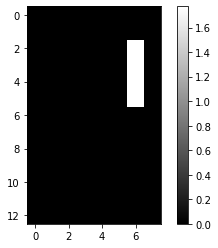

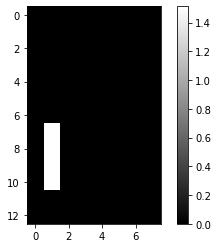

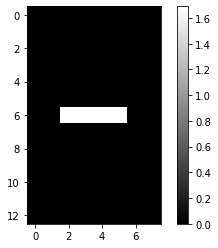

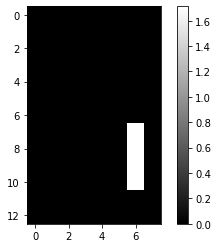

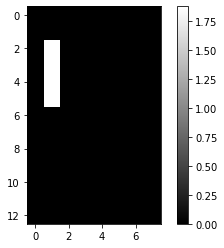

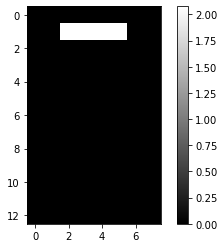

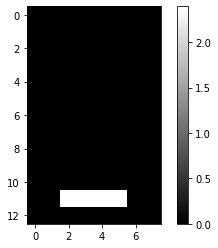

[0.56389272 0.         0.59151401 0.         0.53290007 0.48133215
 0.        ]


In [50]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Select the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

### PCA doesn't learn parts

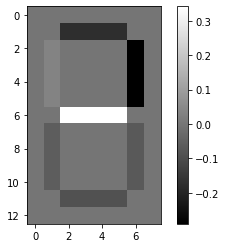

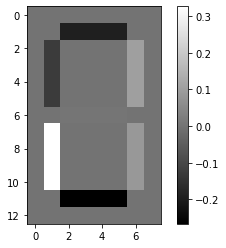

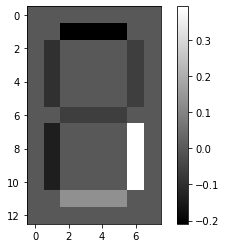

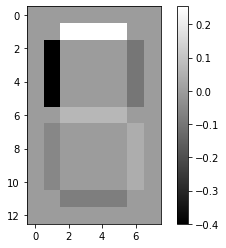

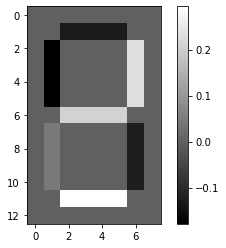

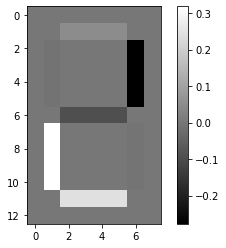

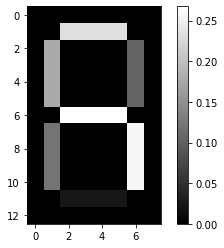

In [51]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    

### **Which articles are similar to 'Cristiano Ronaldo'?**

In [52]:
# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


### **Recommend musical artists part I**

In [102]:
# import pandas as pd
# from scipy.sparse import csr_matrix

# df = pd.read_csv('scrobbler-small-sample.csv', index_col=0)
# artists= csr_matrix(df.transpose())
# artist_names = list(df.columns)

In [104]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

In [ ]:
# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())